## Import Libraries

In [1]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import  RandomForestRegressor, AdaBoostRegressor



from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings('ignore')

## Problem Statement

## Data Gathering

In [2]:
df = pd.read_csv("medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## EDA (Exploratory Data Analysis)

In [3]:
df.head() # It will print by default first 5 records
df.head(10) #It will print first 10 records

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
df.tail() # It will print bydefault last 5 records
df.tail(10) # It will print last 10 records

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [5]:
df.shape # Display shape of dataset with rows and columns

(1338, 7)

In [6]:
df.info() #prints information about the Dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isna().sum() #print missing values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe() #print statistical information for only numeric columns

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.nunique() #returns the number of unique values for each column

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [10]:
df.dtypes #print the data type of every column

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
df['sex'].value_counts() # returns counts of unique values

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

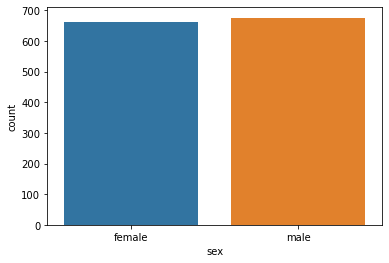

In [12]:
sns.countplot(x=df["sex"])

In [13]:
df["sex"].replace({'male':1,'female':0},inplace=True)

In [14]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

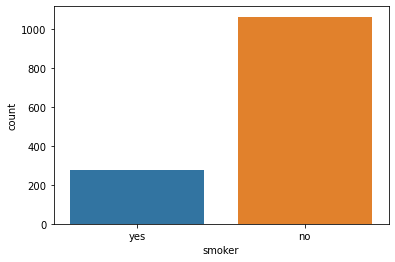

In [15]:
sns.countplot(x=df["smoker"])

In [16]:
df["smoker"].replace({"yes":1,"no":0},inplace=True)

In [17]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

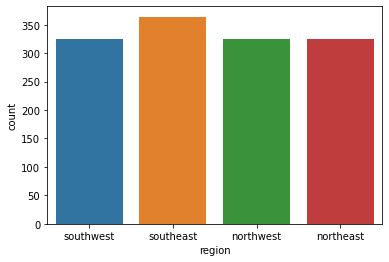

In [18]:
sns.countplot(x=df["region"])

In [19]:
df = pd.get_dummies(df,columns=["region"]) #more than 2 region so applu OHE
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [20]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [21]:
df.info() #All columns converteed into numeric dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   uint8  
 7   region_northwest  1338 non-null   uint8  
 8   region_southeast  1338 non-null   uint8  
 9   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 68.1 KB


### Checking Outliers

<AxesSubplot:xlabel='age'>

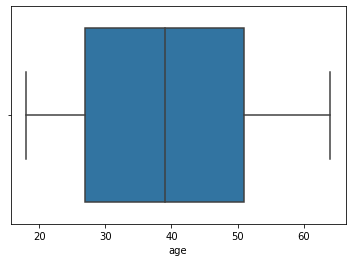

In [22]:
sns.boxplot(df["age"])

<AxesSubplot:xlabel='sex'>

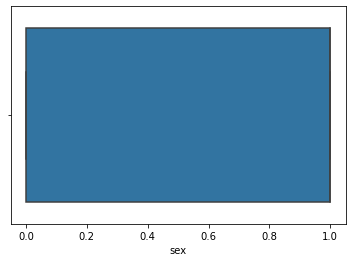

In [23]:
sns.boxplot(df["sex"])

<AxesSubplot:xlabel='bmi'>

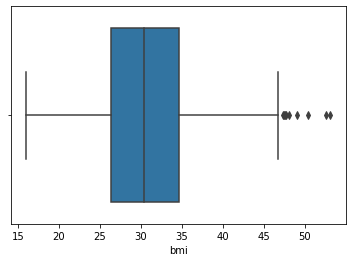

In [24]:
sns.boxplot(df["bmi"])

<AxesSubplot:xlabel='bmi'>

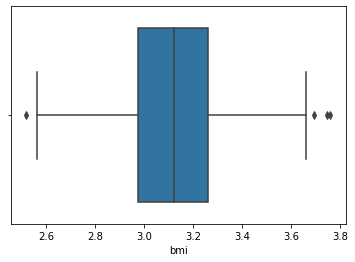

In [25]:
sns.boxplot(np.cbrt(df["bmi"]))

<AxesSubplot:xlabel='bmi'>

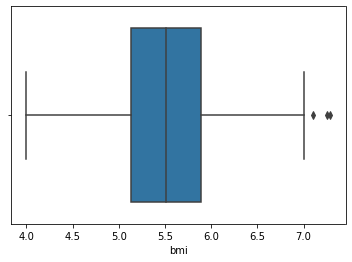

In [26]:
sns.boxplot(np.sqrt(df["bmi"]))

In [27]:
np.sqrt(df['bmi']).describe()

count    1338.000000
mean        5.509917
std         0.551759
min         3.994997
25%         5.127987
50%         5.513620
75%         5.890140
max         7.289033
Name: bmi, dtype: float64

In [28]:
df['bmi'] = df['bmi'].replace(df['bmi'].max(),7.0)
df['bmi'] = df['bmi'].replace(df['bmi'].max(),7.0)
df['bmi'] = df['bmi'].replace(df['bmi'].max(),7.0)

In [29]:
df['bmi'] = df['bmi'].replace(df['bmi'].min(),4.0)

<AxesSubplot:xlabel='bmi'>

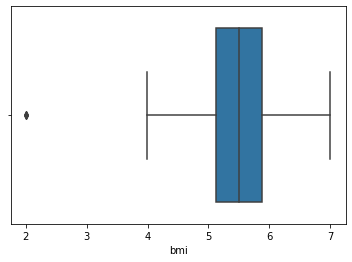

In [30]:
sns.boxplot(np.sqrt(df["bmi"]))

<AxesSubplot:xlabel='children'>

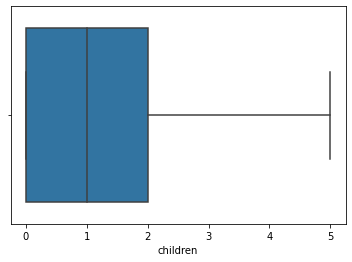

In [31]:
sns.boxplot(df["children"])

In [32]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


## feature selection 

In [33]:
x = df.drop('charges', axis=1)
x.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


In [34]:
y = df["charges"]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

## Train Test split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=34,shuffle=True)

## Model Training

### 1. Linear Regression

In [36]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

### Model Evaluation Linear Regression

In [37]:
# Testing Data Evaluation
y_pred = lr_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print('R-Squared :',r2)

MSE : 41445876.36052937
RMSE : 6437.847183688766
MAE : 4393.091509441654
R-Squared : 0.745083177315921


In [38]:
# Training Data Evaluation

y_pred_train = lr_model.predict(x_train)
mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print('R-Squared :',r2)

MSE : 35838829.060603045
RMSE : 5986.554022190316
MAE : 4079.1362417976243
R-Squared : 0.7481312944390464


### Regularization

In [39]:
# Testing data

ridge_model = Ridge(alpha=0.08) #Alpha = Lambda >> Hyperparameter 
ridge_model.fit(x_train,y_train)

y_pred = ridge_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("Testing MSE is:",mse)
r2 = r2_score(y_test,y_pred)
print("Testing R2 score is:",r2)


Testing MSE is: 41445493.659264
Testing R2 score is: 0.7450855311566207


In [40]:
# Training Data Accuracy
y_pred_train = ridge_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("Testing MSE is:",mse)
r2 = r2_score(y_train,y_pred_train)
print("Testing R2 score is:",r2)

Testing MSE is: 35838849.102670506
Testing R2 score is: 0.7481311535870787


### 2.KNN Regression

<AxesSubplot:xlabel='age', ylabel='Density'>

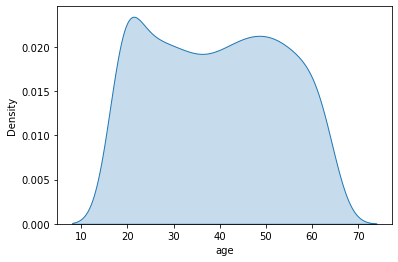

In [41]:
sns.kdeplot(df["age"],fill=True)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

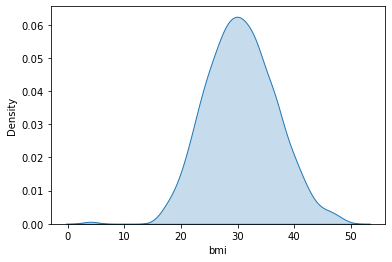

In [42]:
sns.kdeplot(df["bmi"],fill=True)

In [43]:
std_scalar = StandardScaler()
std_scalar.fit(x_train) # we are storing minimum and maximum values
array = std_scalar.transform(x_train)

std_train_xdf = pd.DataFrame(array,columns =x_train.columns )
std_train_xdf.head(3)

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.423968,-1.03423,0.748575,-0.918456,-0.504377,-0.566558,1.787758,-0.598221,-0.585264
1,-0.995215,-1.03423,-0.607141,0.784746,-0.504377,-0.566558,1.787758,-0.598221,-0.585264
2,0.076668,-1.03423,-1.161752,1.636347,-0.504377,1.765045,-0.559360,-0.598221,-0.585264


In [44]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(std_train_xdf,y_train)

KNeighborsRegressor()

In [45]:
#Training data accuracy

y_pred_train = knn_reg.predict(std_train_xdf)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared :",r2_value)

MSE : 20108305.629682735
RMSE: 4484.228543426699
MAE : 2687.0581840811215
R-Squared : 0.8586825227630077


In [46]:
array = std_scalar.transform(x_test)
std_test_df = pd.DataFrame(array,columns = x_test.columns)

In [47]:
#Testing Data Evaluation

y_pred = knn_reg.predict(std_test_df)


mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test,y_pred)
print("R-Squared :",r2_value)

MSE : 33217427.39728895
RMSE: 5763.45620242654
MAE : 3499.344668191791
R-Squared : 0.7956930388876975


r2_train_list:
 [0.918848864587688, 0.8867310833717118, 0.8653233206360246, 0.8527933584901217, 0.8459111404253516, 0.8382747676501187, 0.8319182375785745, 0.8232671019092046, 0.8172509043372667, 0.8112928566027322, 0.8031918048053023, 0.797716217777273, 0.7941945369473282, 0.7882200500052424, 0.7816675383251813, 0.7764994366593969, 0.771682339425393, 0.767734476971232, 0.764415473620622]

r2_test_list:
 [0.7792009408134697, 0.786141283984648, 0.7981719630504261, 0.79673841866685, 0.8027223023341579, 0.7953858494909987, 0.7908763509457245, 0.7894140831844957, 0.7798049501863953, 0.7752155678969374, 0.7763831603939193, 0.7755471436271061, 0.7748322276093349, 0.7758464505383906, 0.7668820503883174, 0.7649016090895269, 0.7620392654512457, 0.7559769063299289, 0.749365338096035]


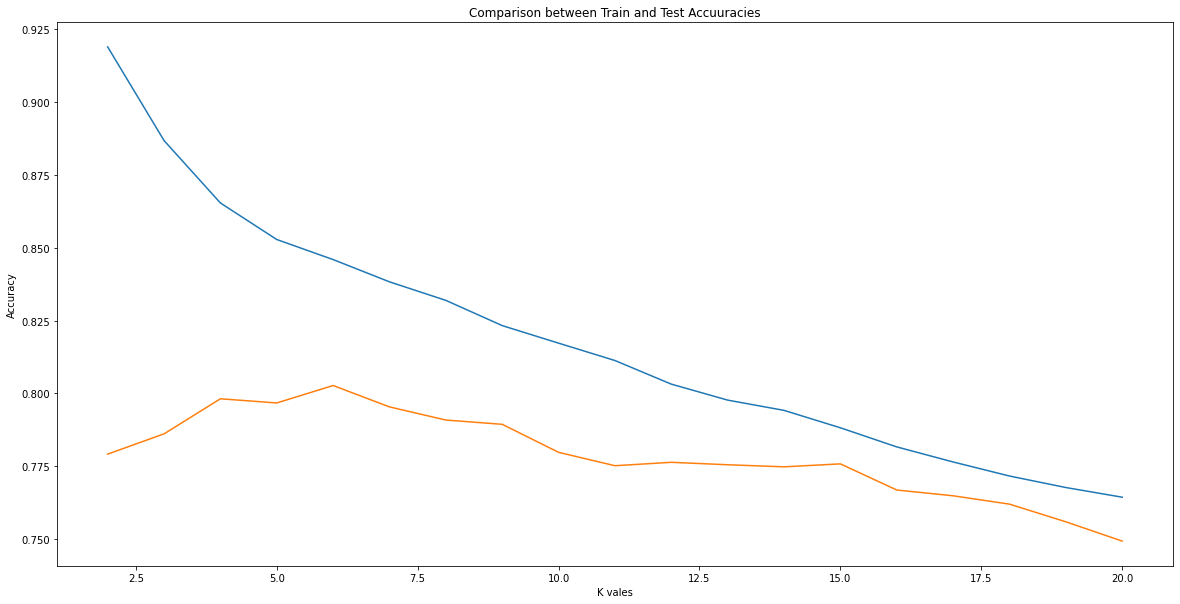

In [48]:
r2_train_list = []
r2_test_list = []
k_values = range(2,21)
for k in k_values:
    knn_reg = KNeighborsRegressor(n_neighbors=k,p=1)
    knn_reg.fit(std_train_xdf,y_train)
    r2_train = knn_reg.score(std_train_xdf,y_train)
    r2_train_list.append(r2_train)
    
    r2_test = knn_reg.score(std_test_df,y_test)
    r2_test_list.append(r2_test)
    
print("r2_train_list:\n",r2_train_list )
print()
print("r2_test_list:\n",r2_test_list)


plt.figure(figsize=(20,10))
plt.plot(k_values,r2_train_list)
plt.plot(k_values,r2_test_list)
plt.xlabel("K vales")
plt.ylabel("Accuracy")
plt.title("Comparison between Train and Test Accuuracies")
plt.savefig("K values comparision.jpeg")

In [49]:
knn_reg = KNeighborsRegressor(n_neighbors=6,p=1)
knn_reg.fit(std_train_xdf,y_train)

KNeighborsRegressor(n_neighbors=6, p=1)

In [50]:
#Training data accuracy

y_pred_train = knn_reg.predict(std_train_xdf)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared :",r2_value)

MSE : 21925567.474291265
RMSE: 4682.474503325273
MAE : 2844.060095118224
R-Squared : 0.8459111404253516


In [51]:
#Testing Data Evaluation

y_pred = knn_reg.predict(std_test_df)


mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test,y_pred)
print("R-Squared :",r2_value)

MSE : 32074568.402578183
RMSE: 5663.4413921729765
MAE : 3423.4055401529854
R-Squared : 0.8027223023341579


### Hyperparameter Tunning for KNN

In [52]:
knn_reg = KNeighborsRegressor() 

hyperparameters = {"n_neighbors" : np.arange(3,20),
                  'p' :[1,2]}

gscv_knn_reg = GridSearchCV(knn_reg,hyperparameters,cv=5)
gscv_knn_reg.fit(std_train_xdf, y_train)
gscv_knn_reg.best_estimator_

KNeighborsRegressor(n_neighbors=7)

In [53]:
knn_reg = KNeighborsRegressor(n_neighbors=7,p=2)
knn_reg.fit(std_train_xdf,y_train)

KNeighborsRegressor(n_neighbors=7)

In [54]:
#Training data accuracy

y_pred_train = knn_reg.predict(std_train_xdf)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared :",r2_value)

MSE : 23057493.012847736
RMSE: 4801.821843097444
MAE : 2914.3602052320425
R-Squared : 0.8379561757219706


In [55]:
#Testing Data Evaluation

y_pred = knn_reg.predict(std_test_df)


mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2_value = r2_score(y_test,y_pred)
print("R-Squared :",r2_value)

MSE : 33026840.540089693
RMSE: 5746.8983408521935
MAE : 3496.384612130597
R-Squared : 0.7968652615633615


### 3. Decision Tree

In [56]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [57]:
# Testing Data Evaluation
y_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print('R-Squared :',r2)

MSE : 50418361.20150288
RMSE : 7100.588792593392
MAE : 3629.3476492873133
R-Squared : 0.6898970519859652


In [58]:
# Training Data Evaluation

y_pred_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train, y_pred_train)
print('R-Squared :',r2)

MSE : 73028.23141588499
RMSE : 270.2373612509658
MAE : 11.683379953271027
R-Squared : 0.9994867710079194


### Hyperparameter Tunning Decision Tree

In [59]:
dt_reg = DecisionTreeRegressor()

hyperparameters ={ "criterion" :['mse','mae'],
     'max_depth': np.arange(3,14),
     'min_samples_split' : np.arange(2,20),
     'min_samples_leaf':np.arange(2,15)}

gscv_dt_reg = RandomizedSearchCV(dt_reg,hyperparameters, cv = 5)
gscv_dt_reg.fit(x_train, y_train)
gscv_dt_reg.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=6, min_samples_leaf=6,
                      min_samples_split=10)

In [60]:
dt_reg = gscv_dt_reg.best_estimator_
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=6, min_samples_leaf=6,
                      min_samples_split=10)

In [61]:
# Testing Data Evaluation
y_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print('*'*80)

r2_value = r2_score(y_test, y_pred)
print("R-Squared Value is :",r2_value)

MSE : 23329535.210841354
********************************************************************************
RMSE : 4830.065756368266
********************************************************************************
MAE : 1926.012652033582
********************************************************************************
R-Squared Value is : 0.8565094645626149


In [62]:
# Training Data Evaluation
y_pred_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('-'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*80)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('-'*80)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared Value is :",r2_value)

MSE : 20840616.62552797
--------------------------------------------------------------------------------
RMSE : 4565.15242084292
--------------------------------------------------------------------------------
MAE : 1687.769404428972
--------------------------------------------------------------------------------
R-Squared Value is : 0.8535359756400619


### pruning

In [63]:
decision_tree_model = DecisionTreeRegressor(random_state=10)
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=10)

In [64]:
result = decision_tree_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']
# ccp_alpha_list

In [65]:
train_accuracy_list = []
test_accuracy_list = []
for ccp_alpha in ccp_alpha_list:
    dt_reg_model = DecisionTreeRegressor(random_state=10,ccp_alpha=ccp_alpha)
    dt_reg_model.fit(x_train, y_train)
    train_accuracy_list.append(dt_reg_model.score(x_train, y_train))
    test_accuracy_list.append(dt_reg_model.score(x_test, y_test))

# train_accuracy_list
# test_accuracy_list

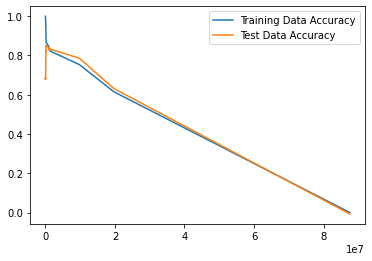

In [66]:
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
ax.plot(ccp_alpha_list, test_accuracy_list, label = "Test Data Accuracy")
ax.legend()

In [67]:
np.where(test_accuracy_list == np.max(test_accuracy_list))

(array([899], dtype=int64),)

In [68]:
test_accuracy_list[899]

0.8512209809707101

In [69]:
train_accuracy_list[899]

0.8779900988170838

In [70]:
ccp_alpha_list[899]

183378.70204150787

In [71]:
decision_tree_model = DecisionTreeRegressor(random_state=10,ccp_alpha=ccp_alpha_list[899])
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=183378.70204150787, random_state=10)

In [72]:
# Testing Data Evaluation
y_pred = decision_tree_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print('*'*80)

r2_value = r2_score(y_test, y_pred)
print("R-Squared Value is :",r2_value)

MSE : 24189367.97816096
********************************************************************************
RMSE : 4918.268798892651
********************************************************************************
MAE : 2601.082606961153
********************************************************************************
R-Squared Value is : 0.8512209809707101


In [73]:
# Training Data Evaluation
y_pred_train = decision_tree_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('*'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('*'*80)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('*'*80)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared Value is :",r2_value)

MSE : 17360997.59776384
********************************************************************************
RMSE : 4166.653045042728
********************************************************************************
MAE : 2375.2357429547455
********************************************************************************
R-Squared Value is : 0.8779900988170838


In [74]:
plt.figure(figsize=(200,100))
plot_tree(decision_tree_model,feature_names=x.columns,filled=True)
plt.savefig('DT_Regression_Pruning.png')

In [75]:
decision_tree_model.get_depth()

8

In [76]:
decision_tree_model.feature_importances_

array([0.11997768, 0.        , 0.17368988, 0.00100439, 0.70077496,
       0.        , 0.0031878 , 0.        , 0.00136529])

In [77]:
s1 = pd.Series(decision_tree_model.feature_importances_,index = x.columns)
s1.sort_values()

sex                 0.000000
region_northeast    0.000000
region_southeast    0.000000
children            0.001004
region_southwest    0.001365
region_northwest    0.003188
age                 0.119978
bmi                 0.173690
smoker              0.700775
dtype: float64

<AxesSubplot:>

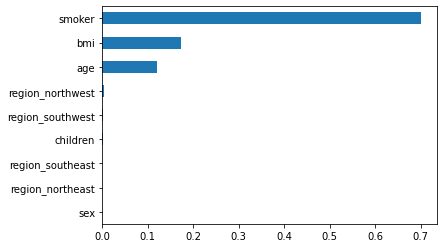

In [78]:
s1.sort_values().plot(kind = "barh")

### 4. Random Forest

In [79]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

RandomForestRegressor()

In [80]:
#Training Data Evaluation

y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)
print("-"*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print("-"*80)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)
print("-"*80)

r2_value = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2_value)

MSE : 3553679.3266910324
--------------------------------------------------------------------------------
RMSE : 1885.1205072066434
--------------------------------------------------------------------------------
MAE: 997.7841772447271
--------------------------------------------------------------------------------
R-Squared value: 0.9750253946500637


In [81]:
#Testing Data Evaluation

y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)
print("-"*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print("-"*80)

mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)
print("-"*80)

r2_value = r2_score(y_test,y_pred)
print("R-Squared value:",r2_value)

MSE : 24198322.7168142
--------------------------------------------------------------------------------
RMSE : 4919.179069399101
--------------------------------------------------------------------------------
MAE: 2701.621723525131
--------------------------------------------------------------------------------
R-Squared value: 0.8511659039950035


### Hyperparameter Tunning

In [82]:
rf_reg = RandomForestRegressor()

hyperparameters = {'n_estimators':np.arange(10,100),
                    'criterion':['mse','mae'],
                    'max_depth':np.arange(3,8),  
                    'min_samples_split':np.arange(4,20),
                    'min_samples_leaf':np.arange(3,10),
                    'random_state':[11]}
           
rscv_rf_reg = RandomizedSearchCV(rf_reg,hyperparameters,cv = 5) 
rscv_rf_reg.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': array([3, 4, 5, 6, 7]),
                                        'min_samples_leaf': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99]),
                                        'random_state': [11]})

In [83]:
rscv_rf_reg.best_estimator_

RandomForestRegressor(max_depth=7, min_samples_leaf=8, min_samples_split=18,
                      n_estimators=30, random_state=11)

In [84]:
rf_reg = rscv_rf_reg.best_estimator_
rf_reg.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, min_samples_leaf=8, min_samples_split=18,
                      n_estimators=30, random_state=11)

In [85]:
#Test Data Evaluation

y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

print("*"*80)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

print("*"*80)
mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)
print("*"*80)
r2_value = r2_score(y_test,y_pred)
print("R-Squared value:",r2_value)

MSE : 21981674.009518154
********************************************************************************
RMSE : 4688.461795676504
********************************************************************************
MAE: 2549.333202112534
********************************************************************************
R-Squared value: 0.8647996136686831


In [86]:
#Training Data Evaluation

y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

print("*"*80)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

print("*"*80)
mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)
print("*"*80)
r2_value = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2_value)

MSE : 16044017.895359434
********************************************************************************
RMSE : 4005.4984577901705
********************************************************************************
MAE: 2218.3535292748397
********************************************************************************
R-Squared value: 0.8872455901818752


### 5.Adaboost

In [87]:
adb_reg = AdaBoostRegressor()
adb_reg.fit(x_train,y_train)

AdaBoostRegressor()

In [88]:
#Test Data Evaluation

y_pred = adb_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)

print("*"*80)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

print("*"*80)
mae = mean_absolute_error(y_test,y_pred)
print("MAE:",mae)
print("*"*80)
r2_value = r2_score(y_test,y_pred)
print("R-Squared value:",r2_value)

MSE : 25040577.35192757
********************************************************************************
RMSE : 5004.056090006144
********************************************************************************
MAE: 3765.72169758068
********************************************************************************
R-Squared value: 0.8459855363848131


In [89]:
#Training Data Evaluation

y_pred_train = adb_reg.predict(x_train)

mse = mean_squared_error(y_train,y_pred_train)
print("MSE :",mse)

print("*"*80)
rmse = np.sqrt(mse)
print("RMSE :",rmse)

print("*"*80)
mae = mean_absolute_error(y_train,y_pred_train)
print("MAE:",mae)
print("*"*80)
r2_value = r2_score(y_train,y_pred_train)
print("R-Squared value:",r2_value)

MSE : 25356393.995706446
********************************************************************************
RMSE : 5035.51328026314
********************************************************************************
MAE: 3979.5541697725516
********************************************************************************
R-Squared value: 0.8217999220177463


In [90]:
d1=["Linear","KNN","Decision Tree","Random Forest","AdaBoost"]
d2=["Testing Accuracy","Training Accuracy","Variance"]

In [91]:
d1={'Algorithm':["Linear","KNN","Decision Tree","Random Forest","AdaBoost"],
     "Testing Accuracy":[74.50,79.68,85.38,86.42,85.17],
      "Training Accuracy":[74.81,83.79,86.25,88.81,82.24],
     "Variance":[0.31,4.11,0.87,2.39,2.93]}
df=pd.DataFrame(d1)
df

,Algorithm,Testing Accuracy,Training Accuracy,Variance
0,Linear,74.50,74.81,0.31
1,KNN,79.68,83.79,4.11
2,Decision Tree,85.38,86.25,0.87
3,Random Forest,86.42,88.81,2.39
4,AdaBoost,85.17,82.24,2.93


### Final Model Decision Tree

In [92]:
dt_reg = DecisionTreeRegressor(criterion='mae', max_depth=8, min_samples_leaf=4,
                      min_samples_split=7)

In [93]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=8, min_samples_leaf=4,
                      min_samples_split=7)

In [94]:
# Testing Data Evaluation
y_pred = dt_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)

r2 = r2_score(y_test, y_pred)
print('R-Squared :',r2)

MSE : 23744609.0230177
RMSE : 4872.844038445895
MAE : 1882.5221608955223
R-Squared : 0.8539565134207703


In [95]:
# Training Data Evaluation
y_pred_train = dt_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('-'*80)

rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*80)

mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('-'*80)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared Value is :",r2_value)

MSE : 19539818.63278424
--------------------------------------------------------------------------------
RMSE : 4420.386706249154
--------------------------------------------------------------------------------
MAE : 1530.7855385411212
--------------------------------------------------------------------------------
R-Squared Value is : 0.8626777449226083


### Creating pikle file

In [96]:
import pickle

with open("DT_Regressor.pkl","wb") as f:
    pickle.dump(dt_reg,f)

In [99]:
project_data = {"sex": {'female':0,'male':1},
                      "smoker":{'no':0,'yes':1},
                      'columns' : list(x.columns)
                      }

In [100]:
import json
with open("project_data.json","w") as f:
    json.dump(project_data,f)